# 5. Probabilistic Algorithms

- **Created by Andrés Segura Tinoco**
- **Created on May 17, 2019**
- **Updated on Mar 19, 2021**

A **probabilistic algorithm** is an algorithm that employs a degree of randomness as part of its logic. The algorithm typically uses uniformly random bits as an auxiliary input to guide its behavior, in the hope of achieving good performance in the "average case" over all possible choices of random bits. <a href="#link_one">[1]</a>

In [1]:
# Load the Python libraries
import random
import numpy as np
import timeit
from datetime import datetime
from scipy import stats
from scipy.stats import triang

In [2]:
# Load plotting libraries
import matplotlib.pyplot as plt

## 5.1. Pseudo-Random Number Generator (PRNG)

In [3]:
# Creating a random value (no uniform)
ms = datetime.now().microsecond / 1000
ms

517.386

In [4]:
# Set random seed based on machine time
random.seed(ms)

# Creating and showing 10 pseudo-random numbers
for i in range(10):
    num = 1 + random.random() * 9
    print(num)

5.497468472112743
2.6225950482611706
1.8290462989419796
6.026068356475103
5.807122505782318
1.7511528813800674
1.8873107091397876
7.915565403626135
4.465024461776962
2.189807903190388


In [5]:
# This function gets a random number from a uniform distribution between the two input values [min_value, max_value] inclusively
def get_random_number(min_value, max_value):
    range = max_value - min_value
    num = np.random.uniform(0, 1)
    return min_value + range * num;

In [6]:
# Creating and showing 10 pseudo-random numbers
for i in range(10):
    print(get_random_number(1, 10))

9.833507321901086
2.4472516084606113
9.731976138044745
5.0447711207217605
4.296975424691825
3.922392803007285
2.2107924633901685
4.83850799775536
7.7679914789797495
7.823151727709467


## 5.2. Primality Test

### 5.2.1. Fermat little theorem

Fermat's little theorem is a fundamental theorem in elementary number theory, which helps compute powers of integers modulo prime numbers. It is a special case of Euler's theorem, and is important in applications of elementary number theory, including primality testing and public-key cryptography. <a href="#link_two">[2]</a>

$$ a^{n-1} mod(n) = 1 \quad \forall \quad 1 \leq a \leq n - 1 \tag{1} $$

In [7]:
# Basic Primality Test
a = 3
n = 7
a ** (n - 1) % n

1

In [8]:
# Fermat test function
def fermat_test(n, t=3):
    if n > 1:
        for time in range(t):
            a = int(get_random_number(1, n))
            if pow(a, n - 1, n) != 1:
                print('n:', n, ', a:', a)
                return False
        return True
    else:
        return False

In [9]:
# Small-size prime test
fermat_test(7)

True

In [10]:
# Medium-size prime test
fermat_test(65537)

True

In [11]:
# Medium-size no prime test
fermat_test(67297)

n: 67297 , a: 49006


False

### 5.2.2. Miller-Rabin approach

Rabin–Miller primality test is an algorithm which determines whether a given number is prime, similar to the Fermat primality test and the Solovay–Strassen primality test. <a href="#link_three">[3]</a>

In [12]:
# Prime B test
def testB(a, n):
    s = 0
    t = n - 1
    
    while True:
        s = s + 1
        t = t / 2
        if t % 2 == 1:
            break
    
    x = pow(a, n - 1, n)
    if x == 1 or x == n - 1:
        return True
    
    for i in range(1, s):
        x =  pow(x, 2, n)
        if x == n - 1:
            return True
    
    return False

# Miller-Rabin test
def miller_rabin_test(n):
    if n > 4 and n % 2 == 1:
        a = int(get_random_number(2, n-1))
        return testB(a, n)
    
    return (n ==2 or n == 3)

# Check if the number is a Miller-Rabin prime
def is_mr_prime(n, k):
    for i in range(0, k):
        if not miller_rabin_test(n):
            return False
    return True

Algorithm description:
- Accuracy and Reliability $ \geq (1 - \varepsilon) $
- Error: $ \varepsilon \simeq 4^{-k} $
- With $ k = 10 $ then $ \varepsilon \simeq 4^{-10} \simeq 0.00000095 $

So, Let's run the Miller-Rabin test for the first N numbers:

In [13]:
# Calculate prime numbers less than N
prime_list = []
n = 400
kk = 10

for v in range(1, n + 1):
    k = min(v, kk)
    if is_mr_prime(v, k):
        prime_list.append(v)

In [14]:
# Function that plot Prime n number
def plot_primes(primes, n, g_size=16):
    N = int(np.sqrt(n))
    if N*N != n:
        raise ValueError("Need a square grid.")
    
    data = np.zeros(n)
    data[primes] = 1
    data = data.reshape(N, N)

    fig, ax = plt.subplots(figsize = (g_size, g_size))
    ax.imshow(data, cmap="gray_r")

    for i in range(0, n):
        if i in primes:
            ax.text(i%N, i//N, i, color="w", ha="center", va="center")
        else:
            ax.text(i%N, i//N, i, color="b", ha="center", va="center")
            
    # Plot setup
    title = "Prime numbers less than " + str(n)
    ax.set_title(title, fontsize = 20)
    plt.show()

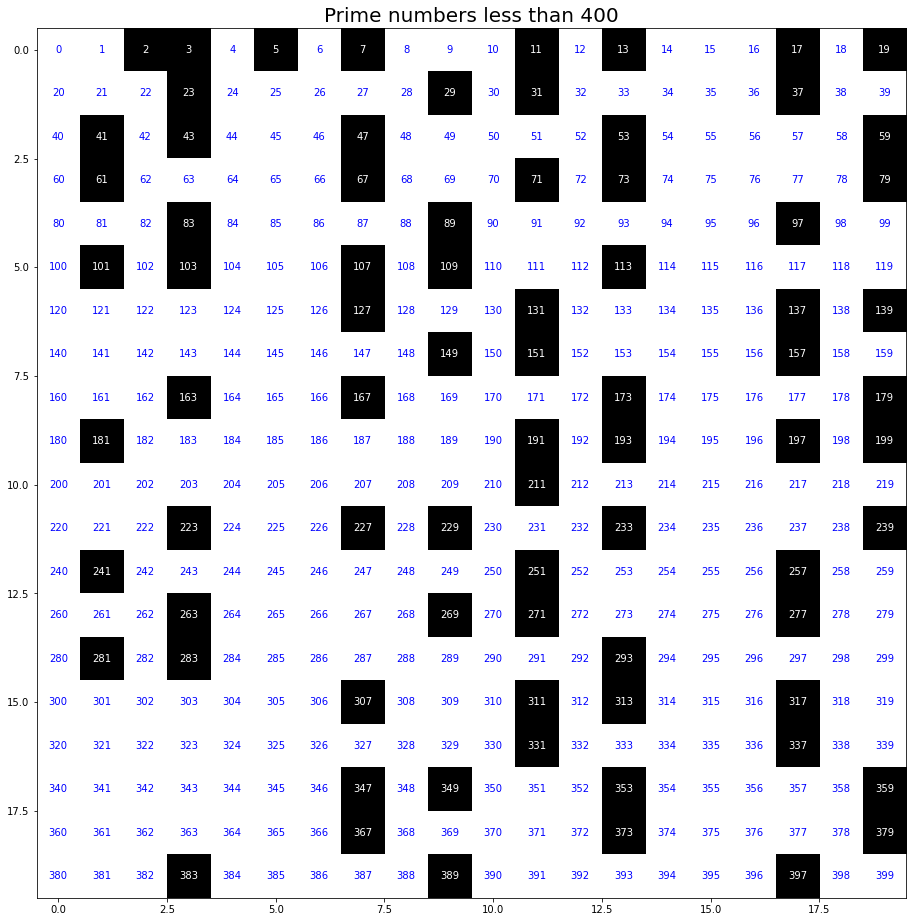

In [15]:
# Ploting Prime numbers less than 400
plot_primes(prime_list, n)

### 5.2.3. Generator of pseudo-random prime numbers

The generation of pseudorandom prime numbers has great relevance, especially for cryptographic purposes.

In [16]:
# Create a pseudo-random prime number (PRPN)
def pseudo_random_prime(l, k, c=100):
    for i in range(c):
        low = pow(10, l - 1)
        high = pow(10, l) - 1
        n = 1 + 2 * int(np.random.uniform(low, high))
        if is_mr_prime(n, k):
            return n, i
    return -1

In [17]:
# Show 10 PRPN of 5 ciphers
l = 5
k = 10
for i in range(10):
    p, c = pseudo_random_prime(l, k)
    if p > 1:
        print('PRPN:', p, ', iter:', c)

PRPN: 155581 , iter: 6
PRPN: 139313 , iter: 7
PRPN: 142067 , iter: 9
PRPN: 163171 , iter: 8
PRPN: 142501 , iter: 5
PRPN: 70309 , iter: 0
PRPN: 190889 , iter: 0
PRPN: 48541 , iter: 2
PRPN: 182059 , iter: 2
PRPN: 152381 , iter: 3


## 5.3. Monte Carlo Simulation

**Monte Carlo** methods are non-deterministic or stochastic algorithms, and are based on the use or generation of pseudo-random numbers to model or simulate different phenomena. The **Monte Carlo** algorithms occasionally make an error, but they find the correct solution with a high probability whatever the case considered.

In [18]:
# Function that plot the circle area with n points
def plot_circle_area(ix, func, n, p1, p2):
    x = func(p1, p2, n)
    y = func(p1, p2, n)
    r = 1
    d = 2 * r
    
    inside = (x**2 + y**2) <= r
    outside = np.invert(inside)
    pi = inside.sum() / n * d**2
    error = abs((pi - np.pi) / pi) * 100
    
    # Plot circle density
    plt.subplot(2, 3, ix)
    plt.plot(x[inside], y[inside], ".", color = '#1f77b4')
    plt.plot(x[outside], y[outside], ".", color = '#ff7f0e')
    plt.plot(0, 0, label='$\hat \pi$ = {:3.3f}\nerror = {:3.3f}%'.format(pi, error), alpha = 0)
    plt.axis('square')
    plt.xlabel('n = ' + str(n))
    plt.legend(fontsize = 11, loc = 'upper right', frameon = True)
    
    # Plot histogram
    xy = list(np.concatenate((x, y)))
    plt.subplot(2, 3, (3 + ix))
    plt.hist(xy, bins = 100, color = '#2ca02c')
    plt.xlabel('Weight')
    plt.ylabel('Probability')

### 5.3.1. Integration with Normal distribution

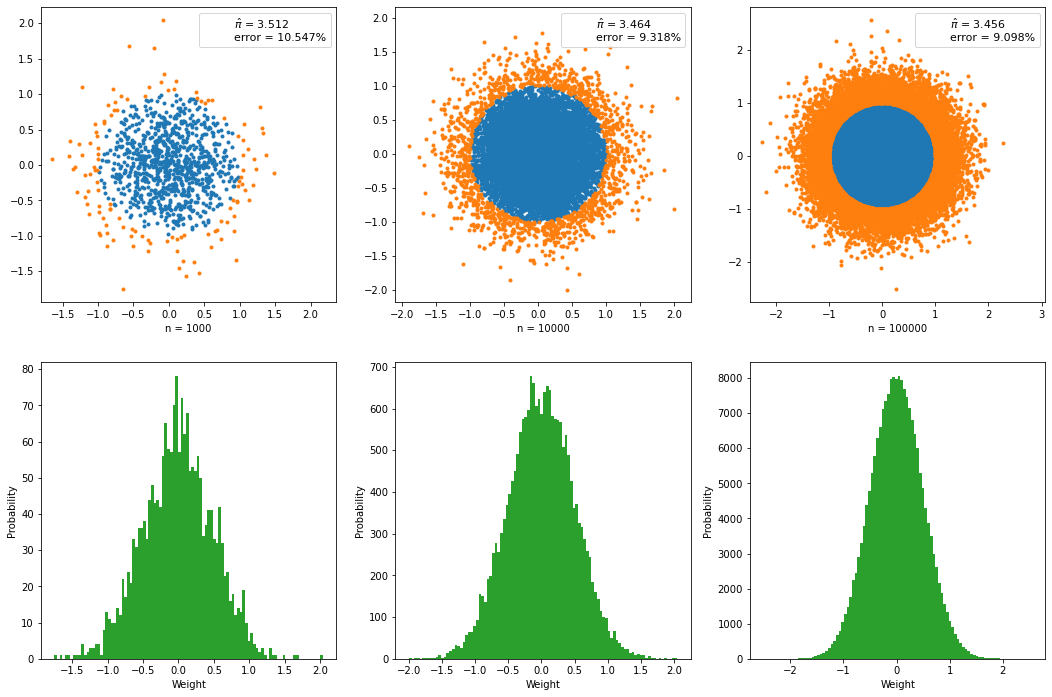

In [19]:
# Plot 3 samples with different N size
fig = plt.figure(figsize = (18, 12))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)
func = np.random.normal

# With 1k points
plot_circle_area(1, func, 1000, 0, 0.5)

# With 10k points
plot_circle_area(2, func, 10000, 0, 0.5)

# With 100k points
plot_circle_area(3, func, 100000, 0, 0.5)

### 5.3.2. Integration with Uniform distribution

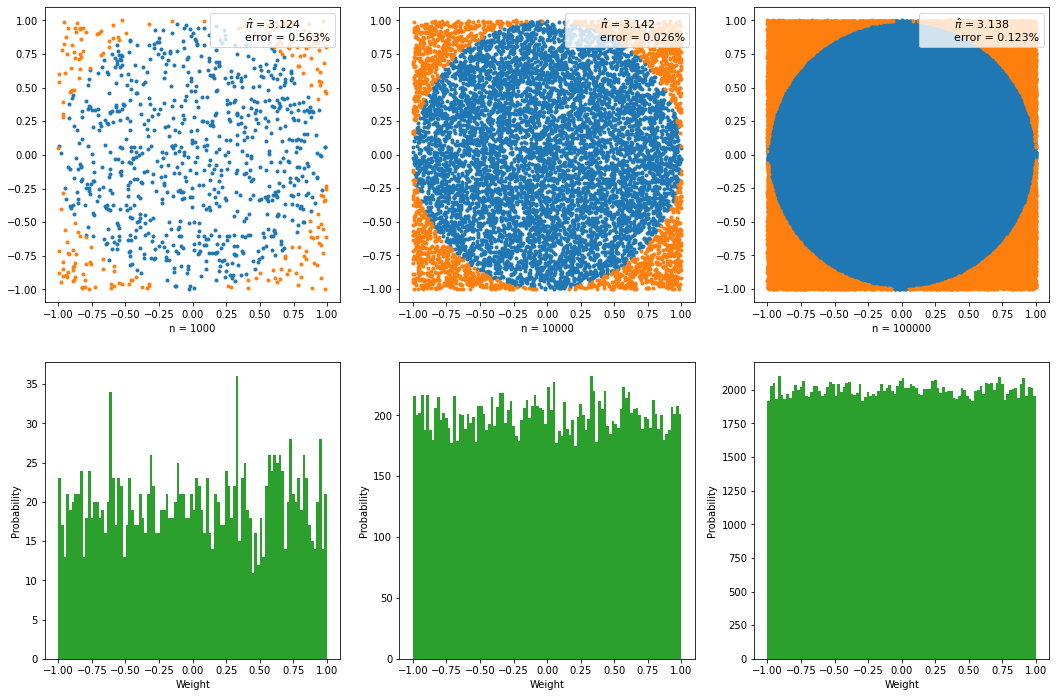

In [20]:
# Plot 3 samples with different N size
fig = plt.figure(figsize = (18, 12))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)
func = np.random.uniform

# With 1k points
plot_circle_area(1, func, 1000, -1, 1)

# With 10k points
plot_circle_area(2, func, 10000, -1, 1)

# With 100k points
plot_circle_area(3, func, 100000, -1, 1)

## 5.4. Metropolis-Hastings Algorithm

In statistics and statistical physics, the **Metropolis–Hastings algorithm** is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult. This sequence can be used to approximate the distribution (e.g. to generate a histogram) or to compute an integral (e.g. an expected value). <a href="#link_four">[4]</a>

In [21]:
# A very simple Metropolis implementation
def metropolis_hastings(func, steps = 10000):
    sample = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        accept = new_prob / old_prob
        if accept >= np.random.random():
            sample[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            sample[i] = old_x
    
    return sample

In [22]:
# Function that plot the data distribution
def plotDist(data, x, y, xll, xrl):
    plt.figure(figsize = (8, 8))
    plt.xlim(xll, xrl)
    plt.plot(x, y, '-', color = '#ff7f0e', lw = 3, label = 'Real distribution')
    plt.hist(data, bins = 50, density = True, label = 'MCMC Estimated distribution')
    plt.xlabel('$x$', fontsize = 12)
    plt.ylabel('$pdf(x)$', fontsize = 12)
    plt.legend(fontsize = 11, loc = 'upper right', frameon = True)
    plt.show()

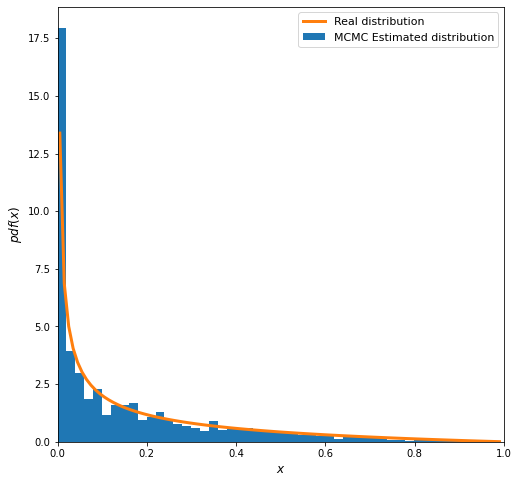

In [23]:
# Beta distribución: n = 10k
func = stats.beta(0.4, 2)
samples = metropolis_hastings(func=func)
x = np.linspace(0.005, .99, 100)
y = func.pdf(x)

# Plot results
plotDist(samples, x, y, 0, 1)

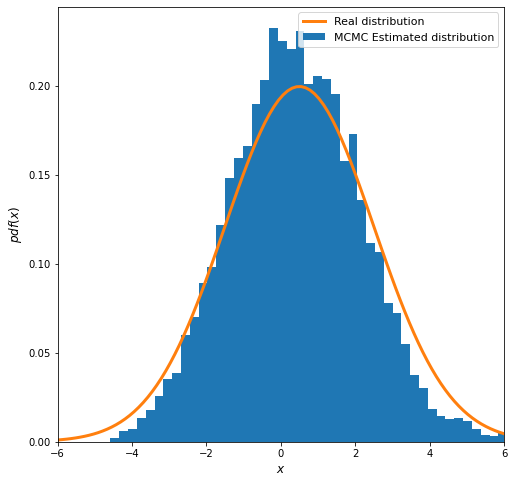

In [24]:
# Normal distribución: n = 10k
func = stats.norm(0.5, 2)
samples = metropolis_hastings(func = func)
x = np.linspace(-6, 6, 100)
y = func.pdf(x)

# Plot results
plotDist(samples, x, y, -6, 6)

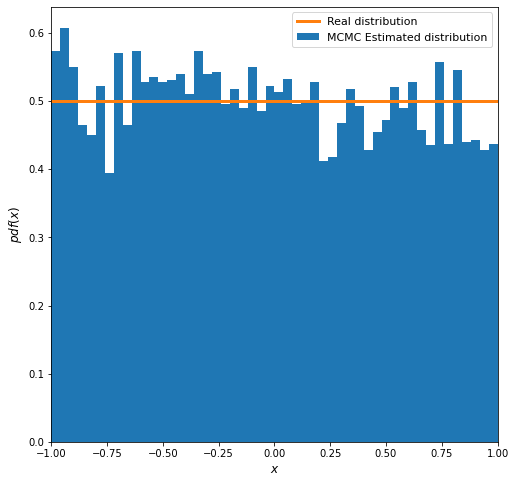

In [25]:
# Uniform distribución: n = 10k
func = stats.uniform(-1, 2)
samples = metropolis_hastings(func = func)
x = np.linspace(-1, 1, 2)
y = func.pdf(x)

# Plot results
plotDist(samples, x, y, -1, 1)

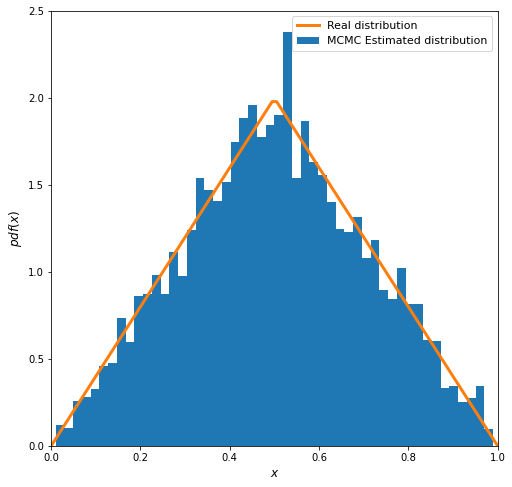

In [26]:
# Triangule distribución: n = 10k
c = 0.5
func = stats.triang(c)
samples = metropolis_hastings(func = func)
x = np.linspace(triang.ppf(0.0, c), triang.ppf(1, c), 100)
y = func.pdf(x)

# Plot results
plotDist(samples, x, y, 0, 1)

## 5.5. Las Vegas Algorithm

**Las Vegas** algorithm is a randomized algorithm that always gives correct results; that is, it always produces the correct result or it informs about the failure. However, the runtime of a Las Vegas algorithm differs depending on the input. The usual definition of a Las Vegas algorithm includes the restriction that the expected runtime be finite, where the expectation is carried out over the space of random information, or entropy, used in the algorithm. <a href="#link_five">[5]</a>

### 5.5.1. Quick Example

The eight queens puzzle is the problem of placing eight chess queens on an 8×8 chessboard so that no two queens threaten each other; thus, a solution requires that no two queens share the same row, column, or diagonal. The eight queens puzzle is an example of the more general n queens problem of placing n non-attacking queens on an n×n chessboard, for which solutions exist for all natural numbers n with the exception of n = 2 and n = 3. <a href="#link_six">[6]</a>

In [27]:
# Calculate placing of chess queens on an N×N chessboard
def place_queens_lv(n_queens):
    result = True
    queens = np.zeros(n_queens, dtype=int)
    ok = np.zeros(n_queens, dtype=int)
    cols = set()
    diag_45 = set()
    diag_135 = set()
    
    for k in range(0, n_queens):
        nb = 0
        for j in range(n_queens):
            if (j not in cols) and ((j-k) not in diag_45) and ((j+k) not in diag_135):
                ok[nb] = j
                nb = nb + 1
        
        if nb > 0:
            rn = int(get_random_number(0, nb))
            j = ok[rn]
            cols.add(j)
            diag_45.add(j-k)
            diag_135.add(j+k)
            queens[k] = j
        else:
            result = False
            break
        
    return result, queens

In [28]:
# Placing N queens with a Las Vegas approach
def run_queens_lv(n, k, verbose):
    start_time = timeit.default_timer()
    queens = []
    result = False
    
    if n > 3:
        for i in range(k):
            result, queens = place_queens_lv(n)
            if result:
                break
    
    if verbose:
        if result:
            print('success:', i)
        else:
            print('failure')

        # Elapsed time
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('elapsed time', elapsed, 'ms')
    
    return result, queens

In [29]:
# Run Las Vegas solution
n_queens = 8
tries = 10
result, queens = run_queens_lv(n_queens, tries, True)

success: 0
elapsed time 0.426900000000785 ms


### 5.5.2. Law of large numbers

In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed. <a href="#link_seven">[7]</a>

Based on the law of large numbers calculate the probability of success of this Las Vegas algorithm.

In [30]:
# Calculate the probability of success of the solution
big_n = 50000
count = 0
for i in range(big_n):
    result, queens = run_queens_lv(n_queens, tries, False)
    if result:
        count += 1

success_prob = round(count / big_n * 100, 4)
print('success probability:', success_prob, '%')

success probability: 75.258 %


### 5.5.3. Plotting the last solution

In [31]:
# Function that plot N queens placed on chessboard
def plot_chessboard(queens, g_size=10):
    n = len(queens)
    data = []
    
    for i in range(n):
        line = [(i + j) % 2 for j in range(n)]
        line[queens[i]] = 5
        data.append(line)
    
    fig, ax = plt.subplots(figsize = (g_size, g_size))
    ax.imshow(data, cmap="gray_r")
    
    for r in range(n):
        q_name = "Q" + str(r + 1)
        ax.text(queens[r], r, q_name, color="w", ha="center", va="center", fontsize=30)
    
    # Plot setup
    title = str(n) + " Queens placed on chessboard"
    ax.set_title(title, fontsize=20)
    plt.xticks(range(0, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
    plt.yticks(range(0, 8), [8, 7, 6, 5, 4, 3, 2, 1])
    plt.show()

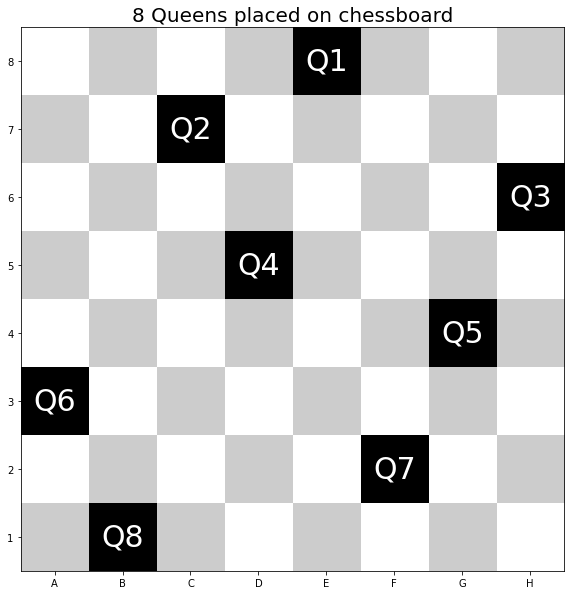

In [32]:
# Plot Queens placed on chessboard
plot_chessboard(queens)

## Reference

<a name='link_one' href='https://en.wikipedia.org/wiki/Randomized_algorithm' target='_blank' >[1]</a> Wikipedia - Randomized algorithm.  
<a name='link_two' href='https://brilliant.org/wiki/fermats-little-theorem/' target='_blank' >[2]</a> Brilliant - Fermat's little theorem.  
<a name='link_three' href='https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test' target='_blank' >[3]</a> Wikipedia - Miller–Rabin primality test.  
<a name='link_four' href='https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm' target='_blank' >[4]</a> Wikipedia - Metropolis–Hastings algorithm.  
<a name='link_five' href='https://en.wikipedia.org/wiki/Las_Vegas_algorithm' target='_blank' >[5]</a> Wikipedia - Las Vegas algorithm.  
<a name='link_six' href='https://en.wikipedia.org/wiki/Eight_queens_puzzle' target='_blank' >[6]</a> Wikipedia - Eight queens puzzle.  
<a name='link_seven' href='https://en.wikipedia.org/wiki/Law_of_large_numbers' target='_blank' >[7]</a> Wikipedia - Law of large numbers.  

<hr>
<p><a href="https://ansegura7.github.io/Algorithms/">« Home</a></p>